In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
trainData = pd.read_csv("/content/temperatures.csv") #Read in temperatures data from csv files

In [ ]:
trainData.head(n=10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
5,1906,22.28,23.69,27.31,31.93,34.11,32.19,31.01,30.30,29.92,29.55,27.60,24.72,28.73,23.03,31.11,30.86,27.29
6,1907,24.46,24.01,27.04,31.79,32.68,31.92,31.05,29.58,30.67,29.87,27.78,24.44,28.65,24.23,29.92,30.80,27.36
7,1908,23.57,25.26,28.86,32.42,33.02,33.12,30.61,29.55,29.59,29.35,26.88,23.73,28.83,24.42,31.43,30.72,26.64
8,1909,22.67,24.36,29.22,30.79,33.06,31.70,29.81,29.81,30.06,29.25,27.69,23.69,28.38,23.52,31.02,30.33,26.88
9,1910,23.24,25.16,28.48,31.42,33.51,31.84,30.42,29.86,29.82,28.91,26.32,23.37,28.53,24.20,31.14,30.48,26.20


In [ ]:
trainData.dtypes
trainData.columns #Check the coloumn names

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
trainData.describe() #Descriptive statistics summary

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


From the above statistics it is clear that the data has total of 117 records.

It contains temperature data of India from 1901 to 2017 month wise.

All the data are recorded in degree celsius

In [ ]:
# check miss value
trainData.isnull().sum()
# Dont have any miss value

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

Also it is found that the data has non null values. So lets start the EDA for this

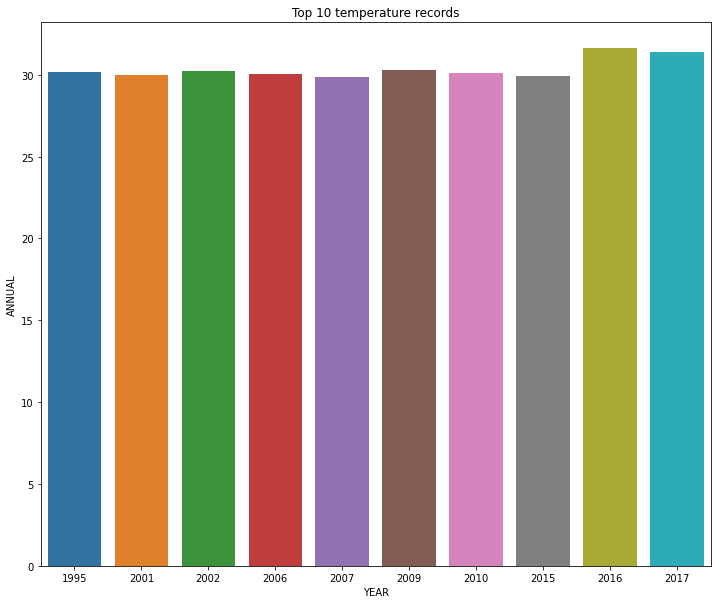

In [ ]:
top_10 = trainData.nlargest(10, "ANNUAL")
plt.figure(figsize=(12,10))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10.YEAR, y=top_10.ANNUAL)

## Apply Linear Regression using suitable library function and predict the Month-wise

In [ ]:
data_2016 = trainData[trainData["YEAR"]==2016]
xticks = np.array(data_2016[["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]].values)
yticks = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

It is found that highest record of temperature is in 2016 roughly about 32 degree celsius

Text(0, 0.5, 'Month')

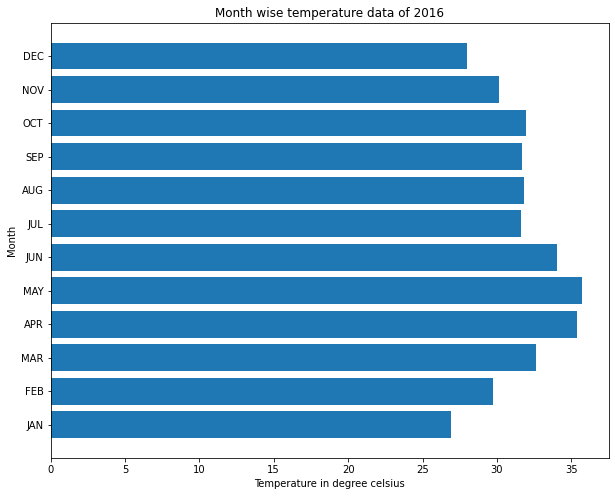

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(yticks,xticks[0])
plt.title("Month wise temperature data of 2016")
plt.xlabel("Temperature in degree celsius")
plt.ylabel("Month")

From the above graph it is clear that May month recorded highest temperature around 35 degree celsius

## Assessthe performance of regression models using MSE, MAE and R-Square metrics

In [ ]:
# from sklearn.metrics import mean_squared_error
# print("MSE",mean_squared_error(Y_test,Y_pred)) #Assess the performance of regression models 

In [ ]:
# from sklearn.metrics import r2_score
# r2=r2_score(Y_test,Y_pred) #Assess the performance of regression models using R-Square metrics
# print(r2)

### Visualize simple regression model.

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
trainData.columns #Check the coloumn names

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
X=trainData[["YEAR"]]
Y=trainData[["JAN"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
len(X_train) #length of X_train

93

In [ ]:
len(X_test) #length of X_test

24

In [ ]:
trainData.shape #check the numbers of samples and features

(117, 18)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
print(X_train)

     YEAR
56   1957
94   1995
35   1936
38   1939
93   1994
..    ...
9    1910
72   1973
12   1913
107  2008
37   1938

[93 rows x 1 columns]


In [ ]:
model = reg.fit(X_train, Y_train)

In [ ]:
r_sq = reg.score(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print("determination coefficient:", r_sq) #calculate determination coefficient

determination coefficient: 0.3548045849122119


In [ ]:
print("intercept:", model.intercept_) #calculate intercept

intercept: [-5.35338281]


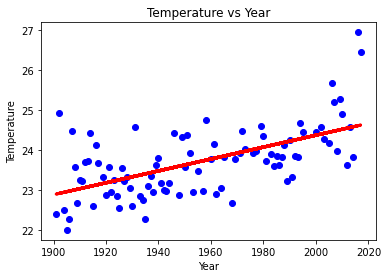

In [ ]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

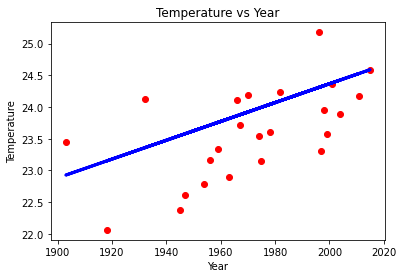

In [ ]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, reg.predict(X_test), color='blue', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

### Assessthe performance of regression models using MSE, MAE and R-Square metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.575735016242341


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.4474127538283697


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.13772507149336943
